### Series Introduction:

Welcome to the **Kaggle Customer Churn Master Series**, where we guide you from the fundamentals to advanced strategies in customer churn prediction. In the [**first notebook**](https://www.kaggle.com/code/deepsutariya/explore-churn-insights-plotly-eda-for-beginners), we laid the groundwork with a thorough Exploratory Data Analysis (EDA), uncovering hidden patterns and preparing our dataset for the rigorous tasks ahead. Now, in the **second notebook** of this series, we're set to transcend the basics, diving into the complexities of ***automated feature engineering using featuretools, model optimization using optuna***, and tailored techniques that push the boundaries of churn prediction.each step is crafted to extract the maximum performance from state-of-the-art models like ***LightGBM, XGBoost, CatBoost , and ANN***.


### Navigation:

- **Previous Notebook:** [Explore Churn Insights: Plotly EDA for Beginners](https://www.kaggle.com/code/deepsutariya/explore-churn-insights-plotly-eda-for-beginners)
- **Next Notebook:** [Churn Modeling to Deployment: MLflow & DagsHub](https://www.kaggle.com/code/deepsutariya/churn-modeling-to-deployment-mlflow-DagsHub)
---

### Series Navigation:

- **First Notebook:** [Explore Churn Insights: Plotly EDA for Beginners](https://www.kaggle.com/code/deepsutariya/explore-churn-insights-plotly-eda-for-beginners)
- **Second Notebook:** [Churn Prediction Featuretools Optuna Mastery](https://www.kaggle.com/code/deepsutariya/churn-prediction-featuretools-optuna-mastery)
- **Third Notebook:** [Churn Modeling to Deployment: MLflow & DagsHub](https://www.kaggle.com/code/deepsutariya/churn-modeling-to-deployment-mlflow-DagsHub)


### Comprehensive Briefing:
In this notebook, I dive deep into the complexities of customer churn prediction by moving beyond traditional approaches. Instead of relying solely on common metrics and methods, I experimented with advanced techniques that often go overlooked. **As we all know , Feature Engineering is The most important part of the ML life cycle**. My approach leveraged automated feature engineering using the Featuretools library, allowing me to extract meaningful insights without needing telecom-specific expertise.

I meticulously optimized multiple state-of-the-art models, including LightGBM, XGBoost, and ANN, using Optuna for hyperparameter tuning. While many focus on ensembling, I found success in fine-tuning individual models and ultimately selecting the best performer, rather than defaulting to a weighted ensemble.

In a unique twist, I incorporated linear regression to explore hyperparameter relationships, aiming to predict combinations that could deliver exceptional performance. Although not all strategies were successful—like SMOTEd datasets and ROC AUC as a primary metric—I identified and honed in on the techniques that truly made a difference. This notebook is a comprehensive exploration of what works and what doesn’t, offering valuable lessons for anyone looking to push the boundaries of churn prediction modeling.

# Detailed Summary and Rationale


### Data Loading and Preprocessing

**DataLoader Class:**
- **Purpose:** Efficiently handle data loading and preprocessing tasks.
- **Details:** The `DataLoader` class initializes with the file path of the dataset, loads the data, preprocesses columns, and converts categorical variables to dummy variables.
- **Rationale:** Automating these tasks ensures consistency and reduces the risk of errors. This modular approach makes the code more maintainable and reusable.

### Train-Test-Validation Split

**Stratified Sampling:**
- **Purpose:** Maintain the class distribution of the target variable across training, testing, and validation sets.
- **Details:** The data is split using stratified sampling to ensure that each set has a balanced representation of both churn and non-churn classes.
- **Rationale:** This approach helps in maintaining the performance metrics' validity and ensures that the model generalizes well across different datasets.

### Handling Class Imbalance

**SMOTE (Synthetic Minority Over-sampling Technique):**
- **Purpose:** Address the issue of class imbalance in the dataset.
- **Details:** SMOTE generates synthetic samples for the minority class to balance the class distribution.
- **Rationale:** Balanced class distribution helps in improving the model's ability to correctly identify both churn and non-churn customers, thereby enhancing the recall and precision of the model.

### Feature Engineering

**Automated Feature Engineering with Featuretools:**
- **Purpose:** Generate new features automatically from the existing dataset.
- **Details:** The Featuretools library is used to create meaningful features by capturing relationships and interactions between different variables.
- **Rationale:** Feature engineering is critical for improving model performance. Automatically generating features can uncover hidden patterns and interactions that might not be immediately obvious.

### Model Training and Selection

**ModelTraining Class:**
- **Purpose:** Train various machine learning models (LightGBM, CatBoost, XGBoost, Neural Network) and select the best-performing one.
- **Details:** The `ModelTraining` class includes methods to train different models with early stopping and feature importance calculation.
- **Rationale:** Using multiple models and selecting the best one based on performance metrics ensures that the final model is robust and well-tuned for the specific task.

### Performance Metrics

**Weighted Recall:**
- **Purpose:** Evaluate the model's ability to correctly identify the positive class (churn) while considering the class distribution.
- **Details:** Weighted recall gives more importance to the minority class, ensuring that the model does not ignore it in favor of the majority class.
- **Rationale:** In churn prediction, correctly identifying churners (the positive class) is crucial for taking preventive actions. Weighted recall helps in optimizing the model for this purpose.

### Optimization

**Optuna for Hyperparameter and Model Selection Optimization:**
- **Purpose:** Find the optimal hyperparameters and model selection to improve performance.
- **Details:** Optuna is used to conduct hyperparameter tuning, maximizing metrics such as ROC AUC, F1 score, and recall score. Additionally, Optuna optimizes the weights for the ensemble model.
- **Rationale:** Hyperparameter optimization and model selection are essential for enhancing model performance and ensuring that the model is well-suited to the data.

### Ensemble Methods

**Optimized Weights for Soft Voting Ensemble:**
- **Purpose:** Combine the predictions of multiple models to improve overall performance.
- **Details:** Optuna is used to optimize the weights for combining predictions from LightGBM, CatBoost, XGBoost, and a neural network.
- **Rationale:** Ensemble methods leverage the strengths of different models, providing a more robust and accurate prediction by reducing individual model biases and variances.

### Linear Regression on Optimized Models

**Fitting Linear Regression:**
- **Purpose:** Capture the relationships between the hyperparameters and the model performance.
- **Details:** Linear regression is used to understand and predict how changes in hyperparameters affect model performance. By fitting a linear regression model, we aim to identify hyperparameter combinations that are likely to yield high performance.
- **Rationale:** This approach helps in fine-tuning the ensemble model by leveraging the insights gained from the linear regression model. It allows for the prediction of hyperparameter sets that are not directly tested but are inferred to perform well based on the regression model.

### Sampler and Checker

**Purpose:**
- Generate a uniformly distributed dataset of hyperparameters.
- Use the linear regression weights to predict the performance of these hyperparameters.
- Apply a performance threshold to select the best models.

**Details:**
- The sampler creates a uniform distribution of hyperparameter values.
- The checker uses the linear regression model to predict the performance of these sampled hyperparameters.
- A performance threshold of 0.635 is applied to filter and select the models.
- Models that satisfy this threshold are then trained and further evaluated.

**Rationale:**
- The uniform distribution ensures a comprehensive exploration of the hyperparameter space.
- The linear regression model helps in quickly estimating the performance of different hyperparameter sets, saving computational resources.
- Applying a performance threshold ensures that only the most promising models are selected for training, improving overall model efficiency and effectiveness.



## What Didn't Work

- **Ensemble Methods:**
  - While ensembling is often used to improve model performance, in this case, the ensemble approach did not yield better results compared to individual models. The ensembles failed to outperform the best single model, suggesting that the combined predictions may have introduced additional noise or reduced the effectiveness of the model.

- **SMOTEd Data:**
  - Applying SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset didn't enhance the model performance as expected. The generated synthetic samples may have introduced patterns that were too similar to existing data, leading to overfitting or not providing the desired generalization.

- **ROC AUC as a Metric:**
  - The ROC AUC metric, while useful in many scenarios, was not as effective in this particular context. It may not have captured the critical aspects of model performance, especially when the focus was on correctly identifying churners (weighted recall being a better alternative).

- **Linear Regression Fitting:**
  - Fitting linear regression to model the relationships between hyperparameters and performance didn't produce the expected improvements. The assumptions of linear regression might not have aligned well with the complexity of the hyperparameter interactions, leading to suboptimal predictions.

## What Worked

- **Automated Feature Engineering:**
  - The use of automated feature engineering, particularly through the Featuretools library, significantly enhanced the model’s performance. It allowed for the generation of meaningful features without needing deep domain expertise, providing a strong foundation for the models.

- **Optimization of LightGBM:**
  - Hyperparameter optimization of the LightGBM model using tools like Optuna resulted in substantial performance improvements. The optimized LightGBM model outperformed others, making it a key component of the final solution.

#### **Flow diagram of the notebook**

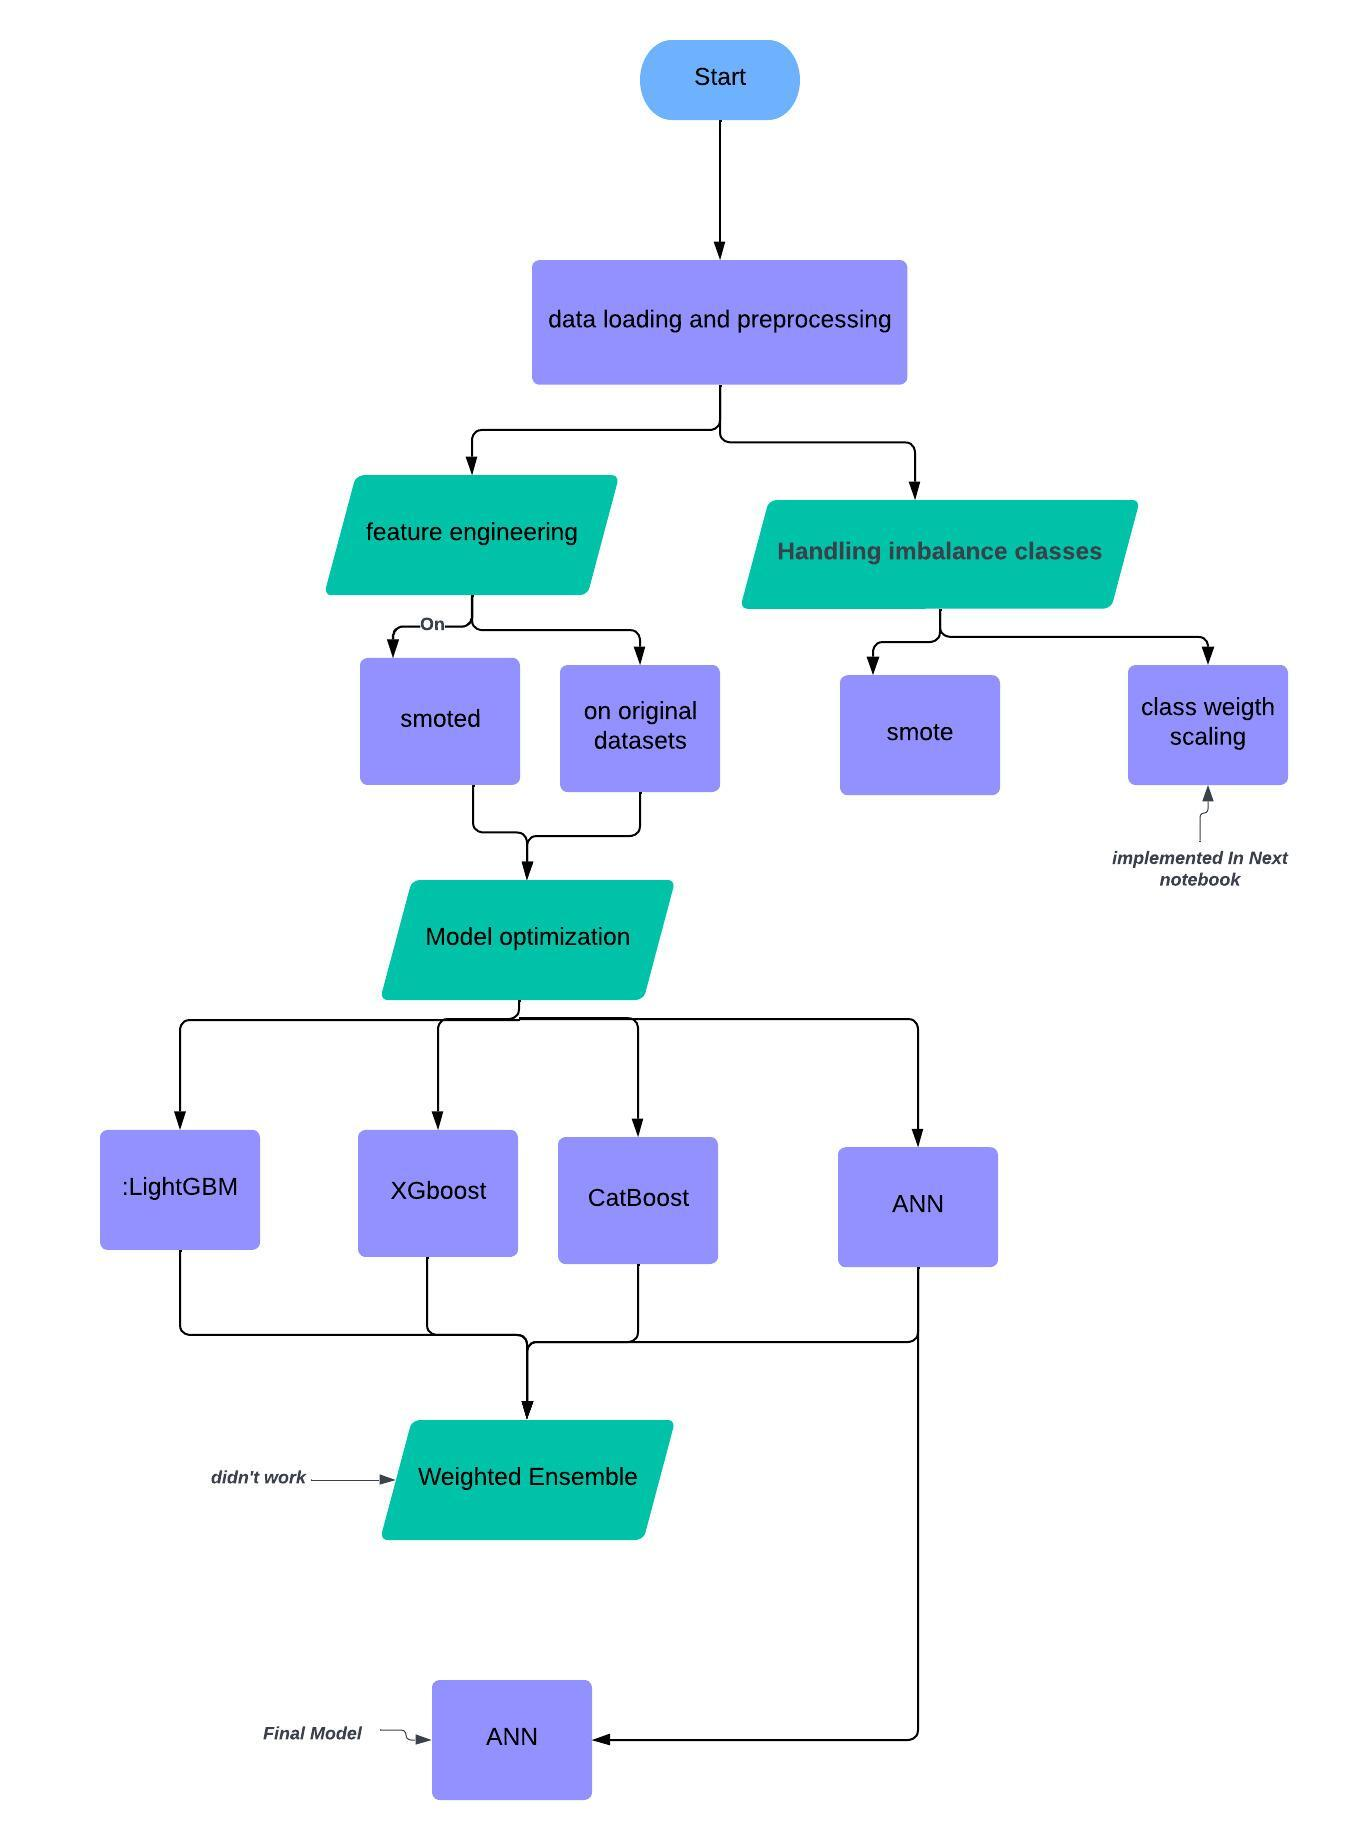

In [51]:
from IPython.display import Image, display

# Path to the image in your local environment
image_path = "../reports/figures/Copy of Algorithm flowchart example(1).jpeg"

# Display the image
display(Image(filename=image_path))

## Variable Descriptions Guide

- **encd_df**: This is the one-hot encoded dataframe used for model training.
- **val_set**: The validation set used to validate the performance of the models during training.
- **train_set_splitted**: The remaining part of the training set after splitting out the validation set.
- **train_set**: The final training set used for training the models.
- **test_set**: The final test set used to evaluate the performance of the trained models.
- **X_train_smoted, y_train_smoted**: The training sets after applying SMOTE to handle class imbalance.

### Classes

- **ModelTrainer (class)**: This class is responsible for training different machine learning models.
- **Feature_Engineering (class)**: This class generates automated features using the `featuretools` library.
- **FeatureTransformer (class)**: This class is responsible for imputing and scaling the features.

### Transformed Sets

- **transformed_featured_train_set, transformed_featured_val_set**: These are the transformed training and validation sets after feature engineering and transformation.
- **transformed_featured_final_train_set, transformed_featured_test_set**: The transformed training set (without splitting) and the test set.
- **transformed_featured_smoted_train_set, transformed_featured_smoted_test_set**: The transformed SMOTEd training and test sets.

### Optimization

- **ModelOptimizer (class)**: This class optimizes the models using Optuna.
- **featured_lgb_study, featured_xgb_study, featured_cat_study, featured_ann_study**: These are the optimized studies of the models on the feature-engineered sets.
- **org_lgb_study, org_xgb_study, org_cat_study, org_nn_study**: These are the optimized studies of the models on the original sets (i.e., without feature engineering).


### Ensemble Results

- **ensemble_result_df**: The results of the ensemble optimization on weights and models.


**If you have any queries please take a look into the [Q&A](#qa-section) section Or comment on this notebook**

In [52]:
# This cell imports all the necessary libraries and modules required 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import featuretools as ft
import lightgbm as lgb
import xgboost as xgb 
import catboost as cb
import tensorflow as tf
import re
import optuna
import warnings
import time
import shutil
from sklearn.preprocessing import OneHotEncoder,StandardScaler , OrdinalEncoder 
from sklearn.utils.class_weight import compute_class_weight
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin ,ClassifierMixin
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tensorflow.keras.layers import Dense,Input,Flatten,Concatenate,BatchNormalization
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import load_model

In [53]:
# Suppress all warnings for a cleaner output
# Set seed for numpy and tensorflow for reproducibility
warnings.filterwarnings("ignore")
optuna.logging.set_verbosity(optuna.logging.CRITICAL)
np.random.seed(42)
tf.random.set_seed(42)

# Data preprocessing

In [54]:
# The below class loads the data and performs basic preprocessing steps

class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path  # Store the file path
        self.df = None  # Initialize an empty DataFrame

    def load_data(self):
        # Load data from the CSV file
        self.df = pd.read_csv(self.file_path)
        
        # Replace the 'SeniorCitizen' column values: 0 -> "No", 1 -> "Yes"
        self.df['SeniorCitizen'] = self.df['SeniorCitizen'].replace({0: "No", 1: "Yes"})
        
        # Convert 'TotalCharges' to numeric, coercing errors to NaN
        self.df['TotalCharges'] = pd.to_numeric(self.df['TotalCharges'], errors='coerce')
        
        # Replace the 'Churn' column values: "Yes" -> 1, "No" -> 0
        self.df['Churn'] = self.df['Churn'].replace({"Yes": 1, "No": 0})
        
        # Drop the 'customerID' column and reset the index
        self.df = self.df.drop('customerID', axis=1).reset_index()
        
        return self.df

    def preprocess_data(self):
        # Create dummy variables for categorical features (excluding 'Churn')
        dummy_df = pd.get_dummies(self.df.drop('Churn', axis=1))
        
        # Add the 'Churn' column back to the dummy DataFrame
        dummy_df['Churn'] = self.df['Churn']
        
        return dummy_df

In [55]:
#load the data
data_loader = DataLoader("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = data_loader.load_data()
encd_df = data_loader.preprocess_data()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
# split into train , test ,validation datasets
def split_data(dummy_df):
    train_set, test_set = train_test_split(dummy_df, test_size=0.2, shuffle=True, random_state=42, stratify=dummy_df['Churn'])
    train_set_splitted, val_set = train_test_split(train_set, test_size=0.15, shuffle=True, random_state=42, stratify=train_set['Churn'])
    return train_set, test_set, train_set_splitted, val_set

In [58]:
train_set,test_set,train_set_splitted,val_set = split_data(encd_df.dropna())
X_train , y_train , X_test , y_test = train_set.drop(columns=['Churn','index']) , train_set['Churn'] , test_set.drop(columns=['index','Churn']) , test_set['Churn']
X_train_splitted , y_train_splitted, X_val,y_val = train_set_splitted.drop('Churn',axis = 1 ) , train_set_splitted['Churn'] , val_set.drop('Churn',axis = 1) , val_set['Churn']
X_train_splitted.shape

(4781, 47)

In [59]:
# there is class imbalance that can affect results
# To experiment with balance dataset I am using SMOTE algorithm.
X_train_smoted,y_train_smoted = SMOTE().fit_resample(X_train_splitted,y_train_splitted)

In [60]:
smoted_df = X_train_smoted
smoted_df['Churn'] = y_train_smoted
smoted_df = smoted_df.drop(columns='index').reset_index()

## Feature Selection and Importance

### First we will train a lgb model. This model will act as base line model.

In [61]:
class ModelTrainer:
    def __init__(self, train_data, test_data, df=None, model_name=None):
        self.model_name = model_name  # Store the model name
        self.train_data = train_data  # Training data
        self.test_data = test_data  # Test data
        self.df = df  # Additional DataFrame if needed

    def train_lightgbm(self, params=None):
        # Get feature columns excluding 'Churn'
        columns = self.train_data.drop('Churn', axis=1).columns
        
        # Create LightGBM datasets for training and testing
        train_data = lgb.Dataset(self.train_data.drop('Churn', axis=1), label=self.train_data['Churn'])
        test_data = lgb.Dataset(self.test_data.drop('Churn', axis=1), label=self.test_data['Churn'], reference=train_data)
        
        # Define default parameters if none are provided
        if params is None: 
            params = {
                'objective': 'binary',
                'boosting_type': 'gbdt',
                'metric': 'auc',
                'num_leaves': 31,
                'learning_rate': 0.05,
                'feature_fraction': 0.9,
                'seed': 42,
                # 'verbose': -1,  # Uncomment if verbose output is needed
            }
        
        evals_result = {}  # Dictionary to store evaluation results
        callbacks = [lgb.early_stopping(stopping_rounds=200), lgb.record_evaluation(evals_result)]
        
        # Train the LightGBM model
        booster = lgb.train(params, train_data, num_boost_round=3000, valid_sets=[test_data], callbacks=callbacks)
        
        # Get the AUC score from the evaluation results
        auc_score = evals_result['valid_0']['auc'][-1]
        
        # Get feature importance
        feature_importance = booster.feature_importance(importance_type='gain')
        feature_importance_df = pd.DataFrame({
            'features': columns,
            'importance': feature_importance
        }).sort_values(by='importance', ascending=False)
        
        # Add the AUC score to the feature importance DataFrame
        feature_importance_df['auc'] = auc_score
        
        return feature_importance_df, booster

    def train_catboost(self):
        # Initialize and train the CatBoost classifier
        cat_model = CatBoostClassifier(verbose=0, iterations=3000)
        cat_model.fit(self.train_data.drop('Churn', axis=1), self.train_data['Churn'], early_stopping_rounds=200)
        
        # Predict probabilities and calculate AUC score
        cat_preds = cat_model.predict_proba(self.test_data.drop('Churn', axis=1))[:, 1]
        cat_auc = roc_auc_score(self.test_data['Churn'], cat_preds)
        
        print(cat_auc)
        return cat_auc

    def train_xgboost(self):
        params = {
            'objective': 'binary:logistic',
            'eval_metric': 'auc',
        }
        
        # Create DMatrix for training and evaluation
        dtrain = xgb.DMatrix(data=self.train_data.drop('Churn', axis=1), label=self.train_data['Churn'])
        deval = xgb.DMatrix(data=self.test_data.drop('Churn', axis=1), label=self.test_data['Churn'])

        # Define watchlist for evaluation
        watchlist = [(dtrain, 'train'), (deval, 'eval')]

        # Train the model with early stopping
        bst = xgb.train(
            params,
            dtrain,
            num_boost_round=3000,  # Maximum number of boosting rounds
            evals=watchlist,
            early_stopping_rounds=200,
            verbose_eval=0  # Suppress verbose output
        )

        # Make predictions and calculate AUC score
        xgb_preds = bst.predict(deval)
        xgb_auc = roc_auc_score(self.test_data['Churn'], xgb_preds)
        
        print(xgb_auc)
        return xgb_auc

    def train_neural_network(self):
        #  NaN values and unscaled data  can affect the results in ANN.
        # thus it requires seperate preprocessing
        self.df = self.df.dropna()  # Drop rows with missing values
        
        # Drop 'index' column if it exists
        if 'index' in self.df.columns:
            self.df = self.df.drop('index', axis=1).reset_index(drop=True)
        
        # Separate categorical and numerical columns
        cat_list = [i for i in self.df.columns if self.df[i].dtype == 'object']
        num_list = [i for i in self.df.columns if self.df[i].dtype != 'object']
        num_list.remove('Churn')
        
        # Split the data into training and testing sets
        train_set, test_set = train_test_split(self.df, test_size=0.2, shuffle=True, random_state=42, stratify=self.df['Churn'])
        
        # Define column transformer for preprocessing
        col_tranfm = ColumnTransformer(
            transformers=[
                ("OneHotEncoder", OneHotEncoder(), cat_list),
                ("StandardScaler", StandardScaler(), num_list),
            ],
            n_jobs=-1,
            verbose=True,
            verbose_feature_names_out=True,
            remainder='passthrough'
        )
        
        # Fit and transform the training set
        train_set = col_tranfm.fit_transform(train_set)
        train_set = pd.DataFrame(train_set, columns=col_tranfm.get_feature_names_out())
        
        # Transform the test set
        test_set = col_tranfm.transform(test_set)
        test_set = pd.DataFrame(test_set, columns=col_tranfm.get_feature_names_out())
        
        # Rename the 'Churn' column
        train_set = train_set.rename(columns={'remainder__Churn': 'Churn'})
        test_set = test_set.rename(columns={'remainder__Churn': 'Churn'})
        
        # Split the training set further into training and validation sets
        train_set_splitted, val_set = train_test_split(train_set, test_size=0.15, shuffle=True, random_state=42, stratify=train_set['Churn'])
        
        # Separate features and target variable for training and validation sets
        X_train, y_train = train_set.drop('Churn', axis=1), train_set['Churn']
        X_val, y_val = val_set.drop('Churn', axis=1), val_set['Churn']
        X_train_splitted, y_train_splitted = train_set_splitted.drop('Churn', axis=1), train_set_splitted['Churn']
        
        # Convert data types to float64
        X_train_splitted = X_train_splitted.astype('float64')
        y_train_splitted = y_train_splitted.astype('float64')
        X_val, y_val = X_val.astype('float64'), y_val.astype('float64')
          
        # Define the neural network architecture
        model = Sequential()
        model.add(Dense(64, activation='selu', kernel_initializer='lecun_normal'))
        model.add(Dropout(0.5))
        model.add(Dense(32, activation='selu', kernel_initializer='lecun_normal'))
        model.add(Dropout(0.5))
        model.add(Dense(32, activation='selu', kernel_initializer='lecun_normal'))
        model.add(Dense(1, activation='sigmoid'))
        
        # Compile the model
        model.compile(optimizer="nadam", loss="binary_crossentropy", metrics=['accuracy', AUC(name="roc_auc")])
        
        # Train the model
        history = model.fit(X_train_splitted, y_train_splitted, validation_data=(X_val, y_val), verbose=0, epochs=20)
        
        return history

    def train(self):
        if self.model_name is not None:
            if self.model_name == "lgb":
                return self.train_lightgbm()
            elif self.model_name == "cat":
                return self.train_catboost()
            elif self.model_name == "xgb":
                return self.train_xgboost()
            elif self.model_name == "nn":
                return self.train_neural_network()

In [62]:
model_trainer = ModelTrainer(train_set_splitted.drop(columns='index'),val_set.drop(columns='index'))
feature_importance_df ,_= model_trainer.train_lightgbm()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1271, number of negative: 3510
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 4781, number of used features: 46
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265844 -> initscore=-1.015812
[LightGBM] [Info] Start training from score -1.015812
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.832604


In [63]:
feature_importance_df.head(20)

,features,importance,auc
37,Contract_Month-to-month,8269.075111,0.817638
0,tenure,2270.934093,0.817638
1,MonthlyCharges,1471.169732,0.817638
17,InternetService_Fiber optic,1219.658396,0.817638
2,TotalCharges,1137.229452,0.817638
19,OnlineSecurity_No,1030.521527,0.817638
28,TechSupport_No,682.957915,0.817638
44,PaymentMethod_Electronic check,345.315008,0.817638
16,InternetService_DSL,237.240579,0.817638
38,Contract_One year,217.544422,0.817638


In [64]:
# let's examine how the smoted dataset is peroforming
model_trainer = ModelTrainer(smoted_df.drop(columns='index'),val_set.drop(columns='index'))
feature_importance_df,_ = model_trainer.train_lightgbm()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3510, number of negative: 3510
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 7020, number of used features: 46
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.835448


# 🚨 **The Critical Role of Feature Engineering in Machine Learning** 🚨

In the rapidly evolving world of machine learning, one truth remains constant: **the quality of your features determines the quality of your model**. Feature engineering is not just another step in the pipeline; it is the foundation upon which your model's performance is built. Without robust, well-crafted features, even the most sophisticated algorithms can falter. 

Imagine you're an architect. You could have the most advanced tools and technology at your disposal, but if the building materials you use are subpar, the final structure will inevitably be weak. The same principle applies in machine learning—**feature engineering is the process of transforming raw data into the critical building blocks that empower your model to achieve excellence and ```without exaggeration it is the most important part in the ML lifecycle```**.

## 🛠️ **FeatureTools: The Architect of Your Model’s Success** 🛠️

Enter **FeatureTools**—a powerful library that automates the process of creating meaningful features from your raw data. But make no mistake—this is not just automation for convenience's sake. FeatureTools is your blueprint for success, providing a systematic way to craft features that will enable your model to not only learn but to excel in predicting outcomes with precision.Let's learn this serious topic with fun.

### **Why Feature Engineering Matters**

- **Entities**: These are the ingredients—your raw datasets—like vegetables and spices. In this case, our training and test sets are the ingredients, and just like how each veggie might need to be chopped differently, each dataset needs its own unique index to keep things in order. i.e individual dataframe is named as an entity.

- **EntitySet**: Think of this as your kitchen. It’s where you store all your ingredients (dataframes). Each dataset, like your training and test sets, gets its own special spot in this kitchen, labeled with unique names so they never get mixed up. i.e Set of dataframe(s) and their relations is called entityset.
  


- **Primitive Transformations**: Ever seen a chef quickly dice an onion into perfect little cubes? That’s what these transformations do to your data. They take your basic ingredients and slice them, dice them, and mix them in ways that create new, richer flavors—er, I mean features!. i.e Generating new features from individual features is called ``transformation``.

- **Aggregation**: Picture a large pot where all the diced onions, tomatoes, and spices simmer together. Aggregation takes your data and combines it to extract meaningful patterns. It’s like boiling down all those ingredients into a rich, flavorful stock—perfect for adding depth to your model. i.e Generating features from combination of multiple features is called ``Aggregation``.



## **Building a Model with Purpose**

When you use FeatureTools, you're not just building a model—you’re constructing a solution with real-world impact. This isn’t just theory; **this is the practice of creating features that will enable your model to perform reliably in the most demanding production environments**.

In our `Feature_Engineering` class, we’re taking this theory into practice. From setting up your EntitySet to generating and refining features, every step is a deliberate action to enhance your model’s performance. This is feature engineering with a purpose.

1. **Create_Entityset**: First, we set up our kitchen with the `Create_Entityset` method. We organize our ingredients (datasets) neatly, making sure everything has its place. If our ingredients don’t come pre-labeled (indexed), our magical helpers create labels for us, ensuring nothing gets lost in the mix. i.e this method creates ``Entityset`` from multiple dataframe(s) and their relations.

2. **add_dataframe**: Using this method we can add dataframe into the entity set.For that  we should provide dataframe_name,datframe,index(if your dataframe hasn't index you have to set make_index=True).

2. **Generate_Features**: Next, we call on FeatureTools to start the real magic—transforming our raw ingredients into delicious features. It’s like watching a chef in action, taking raw veggies and turning them into a gourmet meal. Whether it's chopping (transformations) or slow-cooking (aggregations), our features get enhanced, refined, and prepped for the main event: feeding the model!. i.e this method generates features from raw data and combine it with target dataframe.

3. **Cleaning and Alignment**: But even in the best kitchens, you need to tidy up. So, we clean the names, remove any duplicates, and ensure that everything is aligned perfectly between the training and test sets—no mismatched spices here!. i.e After feature engineering we will get **mutlilevel indexed** target dataframe. we have to convert it into normal dataframe. 

## **Important Terminologies**

### Transformation Primitives
- **Transformation Primitives** are like little recipes that take one column and create new features by applying mathematical or logical operations. For example, if you have a column with dates, a transformation primitive could create a new column with the day of the week (Monday, Tuesday, etc.).

### Aggregation Primitives
- **Aggregation Primitives** are used when you have data grouped in some way, like sales data for different stores. These primitives combine the data in each group to create a single summary value, like the average sales per store or the total sales for each month.

### Ignore Columns
- **Ignore Columns** are columns that you tell the program not to use when creating new features. Maybe these columns contain information that would give away the answer too easily (like a column that directly says whether a customer has left), or maybe they just aren't useful for your model.


For more details visit featuretools [Documentation](https://featuretools.alteryx.com/en/stable/)

In [65]:
class Feature_Engineering:
    def __init__(self, train_set, test_set, df):
        self.train_set = train_set  # Training dataset
        self.test_set = test_set  # Test dataset
        self.entity_set = None  # Placeholder for entity set
        self.train_set_name = None  # Name of training dataset in entity set
        self.test_set_name = None  # Name of test dataset in entity set
        self.df = df  # Original DataFrame

    def Create_Entityset(self, entity_id, train_set_name, test_set_name, index_name=None):
        # Check if index_name is not present in train and test sets
        if index_name not in self.train_set.columns and index_name not in self.test_set.columns:
            es = ft.EntitySet(id=entity_id)
            # Add train_set to the entity set with make_index=True
            es.add_dataframe(
                dataframe_name=train_set_name,
                dataframe=self.train_set, 
                make_index=True,
                index=index_name,
                # time_index='tenure'  # Uncomment if using time index
            ) 
            # Add test_set to the entity set with make_index=True
            es.add_dataframe(
                dataframe_name=test_set_name,
                dataframe=self.test_set,
                make_index=True,
                index=index_name,
                # time_index='tenure'  # Uncomment if using time index
            )
        else:
            es = ft.EntitySet(id=entity_id)
            # Add train_set to the entity set with existing index
            es.add_dataframe(
                dataframe_name=train_set_name,
                dataframe=self.train_set,
                index=index_name,
                # time_index='tenure'  # Uncomment if using time index
            )
            # Add test_set to the entity set with existing index
            es.add_dataframe(
                dataframe_name=test_set_name,
                dataframe=self.test_set,
                index=index_name,
                # time_index='tenure'  # Uncomment if using time index
            )
        self.entity_set = es  # Store the entity set
        self.train_set_name = train_set_name  # Store the training set name
        self.test_set_name = test_set_name  # Store the test set name

    def __clean_feature_names(self, df):
        # Clean column names by replacing special characters with underscore
        cleaned_names = []
        for col in df.columns:
            clean_name = re.sub(r'[^A-Za-z0-9_]+', '_', col)
            cleaned_names.append(clean_name)
        df.columns = cleaned_names
        return df

    def __remove_duplicate_columns(self, df):
        # Remove duplicate columns
        df = df.loc[:, ~df.columns.duplicated()]
        return df

    def Generate_Features(self, trans_list=None, agg_list=None, ignore_columns=None, names_only=True):
        if names_only == False:
            # Generate features for training set
            # dfs generate features from data and merge them with target dataframe
            feature_df, feature_names = ft.dfs(
                entityset=self.entity_set, # for which entity set do you want to generate features.
                target_dataframe_name=self.train_set_name, # To Which dataframe features must be merged? 
                trans_primitives=trans_list, # list of the transformations that you want to apply .
                agg_primitives = agg_list, # Aggregation primitives means methods that combine multiple rows like median,average,sum etc.
                max_depth=2, # Number of  transformation,aggregation  primitves  can be stacked upon each other.
                ignore_columns=ignore_columns, # columns that shouldn't use for feature engineering . Example 'Churn','index'
                features_only=names_only, # should it generate features or just provide names of the
                ignore_dataframes=[self.test_set_name] # which dataframes should avoid to mitigate data leak.
            )
            # Ensure 'index' column in feature_df is treated as integer index
            feature_df = feature_df.reset_index()
            feature_df['index'] = feature_df['index'].astype(int)

            # Align feature_df index to avoid out-of-range or mismatch
            aligned_churn = self.df.loc[feature_df['index'], 'Churn'].reset_index(drop=True)

            # Assign aligned Churn values to feature_df
            feature_df['Churn'] = aligned_churn

            # Generate features for test set
            feature_df_test, features_test_name = ft.dfs(
                entityset=self.entity_set,
                target_dataframe_name=self.test_set_name,
                trans_primitives=trans_list,
                max_depth=2,
                ignore_columns=ignore_columns,
                features_only=names_only,
                ignore_dataframes=[self.train_set_name]
            )
            # Ensure 'index' column in feature_df_test is treated as integer index
            feature_df_test = feature_df_test.reset_index()
            feature_df_test['index'] = feature_df_test['index'].astype(int)

            # Align feature_df_test index to avoid out-of-range or mismatch
            aligned_churn_test = self.df.loc[feature_df_test['index'], 'Churn'].reset_index(drop=True)

            # Assign aligned Churn values to feature_df_test
            feature_df_test['Churn'] = aligned_churn_test

            # Drop 'index' column from feature dataframes
            feature_df = feature_df.drop('index', axis=1)
            feature_df_test = feature_df_test.drop('index', axis=1)

            # Clean feature names for both train and test datasets
            feature_df = self.__clean_feature_names(feature_df)
            feature_df_test = self.__clean_feature_names(feature_df_test)

            # Remove duplicate columns from both datasets
            feature_df = self.__remove_duplicate_columns(feature_df)
            feature_df_test = self.__remove_duplicate_columns(feature_df_test)

            # Remove columns with a single unique value
            single_col_list = [col for col in feature_df.columns if feature_df[col].nunique() == 1]
            feature_df = feature_df.drop(columns=single_col_list)

            # Replace infinite values with NaN
            feature_df = feature_df.replace([-np.inf, np.inf], np.nan)
            feature_df_test = feature_df_test.replace([-np.inf, np.inf], np.nan)

            # Align the datasets to keep only common columns
            featured_train_labels = feature_df['Churn']
            feature_df_aligned, feature_df_test_aligned = feature_df.align(feature_df_test, join='inner', axis=1)
            feature_df_aligned['Churn'] = featured_train_labels

            return feature_df_aligned, feature_df_test_aligned
        else:
            # Generate feature names only for training set
            feature_names = ft.dfs(
                entityset=self.entity_set,
                target_dataframe_name=self.train_set_name,
                trans_primitives=trans_list,
                max_depth=2,
                ignore_columns=ignore_columns,
                features_only=names_only,
                ignore_dataframes=[self.test_set_name]
            )
            # Generate feature names only for test set
            feature_test_names = ft.dfs(
                entityset=self.entity_set,
                target_dataframe_name=self.test_set_name,
                trans_primitives=trans_list,
                max_depth=2,
                ignore_columns=ignore_columns,
                features_only=names_only,
                ignore_dataframes=[self.train_set_name]
            )
            return feature_names, feature_test_names

In [66]:
# For simplicity i am not taking any aggeragation primitives.
trans_list =  [
 'multiply_numeric_boolean',
 'absolute_diff',
 'email_address_to_domain',
 'exponential_weighted_variance',
 'modulo_numeric',
 'rate_of_change',
 'url_to_protocol',
 'greater_than',
 'multiply_numeric_scalar',
 'less_than_equal_to',
 'longitude',
 'age',
 'cosine',
 'subtract_numeric',
 'week',
 'cityblock_distance',
 'rolling_max',
 'subtract_numeric_scalar',
 'is_quarter_end',
 'less_than_scalar',
 'exponential_weighted_std',
 'natural_logarithm',
 'add_numeric_scalar',
 'percent_change',
 'subtract_numeric',
 'is_lunch_time'
]

In [67]:
# while feature generating we shouldn't use Churn and index.
# Using Churn will cause data leak
# Index is redundant feature
ignore_columns = {
    'smoted_train':['Churn','index'],
    'val_test':['Churn','index',]
}
val_copy = val_set.copy()

# let's generate features for the smoted dataset

feature_eng = Feature_Engineering(smoted_df,val_copy,encd_df)
feature_eng.Create_Entityset('smoted','smoted_train','val_test','index')

# the below sets will be used for the evaluation of the smoted datasets
smoted_featured_train_set , smoted_featured_test_set = feature_eng.Generate_Features(trans_list,ignore_columns = ignore_columns , names_only=False)

# let's generate features for the splitted_train , val set
ignore_columns = {
    'train':['Churn','index'],
    'test':['Churn','index',]
}
feature_eng = Feature_Engineering(train_set_splitted,val_set,encd_df)
feature_eng.Create_Entityset('validation','train','test','index')

# the below sets will be used for the training and validation process
featured_train_set , featured_val_set = feature_eng.Generate_Features(trans_list,ignore_columns = ignore_columns , names_only=False)


# below code generate the features for the final_train , test set
ignore_columns = {
    'final_train':['Churn','index'],
    'final_test':['Churn','index',]
}
feature_eng = Feature_Engineering(train_set,test_set,encd_df)
feature_eng.Create_Entityset('final','final_train','final_test','index')
 
# the below sets will be used for the train and test the final model that we will get from the val set
featured_final_train_set , featured_test_set = feature_eng.Generate_Features(trans_list,ignore_columns = ignore_columns , names_only=False)

2024-08-28 07:02:39,831 featuretools - WARNING    Attempting to add feature <Feature: MonthlyCharges - TotalCharges> which is already present. This is likely a bug.
2024-08-28 07:02:39,831 featuretools - WARNING    Attempting to add feature <Feature: MonthlyCharges - tenure> which is already present. This is likely a bug.
2024-08-28 07:02:39,832 featuretools - WARNING    Attempting to add feature <Feature: tenure - TotalCharges> which is already present. This is likely a bug.
2024-08-28 07:02:40,638 featuretools - WARNING    Attempting to add feature <Feature: MonthlyCharges - TotalCharges> which is already present. This is likely a bug.
2024-08-28 07:02:40,639 featuretools - WARNING    Attempting to add feature <Feature: MonthlyCharges - tenure> which is already present. This is likely a bug.
2024-08-28 07:02:40,640 featuretools - WARNING    Attempting to add feature <Feature: tenure - TotalCharges> which is already present. This is likely a bug.
2024-08-28 07:02:41,387 featuretools -

In [68]:
# the result is indicating the significant performance boost due to feature engineering
engineered_feature_importance_df =  ModelTrainer(featured_train_set,featured_val_set).train_lightgbm()

[LightGBM] [Info] Number of positive: 1271, number of negative: 3510
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29420
[LightGBM] [Info] Number of data points in the train set: 4781, number of used features: 202
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265844 -> initscore=-1.015812
[LightGBM] [Info] Start training from score -1.015812
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.831617


**If you find this notebook helpful and inspiring, don’t forget to give it a thumbs up! 👍**

# Training and Optimization

In [69]:
class FeatureTransformer:
    def __init__(self, train_set, test_set):
        self.train_set = train_set  # Training dataset
        self.test_set = test_set  # Test dataset

        # Lists to store numerical and categorical feature names
        self.num_list = [col for col in train_set.columns if train_set[col].dtype != 'bool']
        self.cat_list = [col for col in train_set.columns if train_set[col].dtype == 'bool']
        
        self.num_list.remove('Churn')  # Remove the target variable from numerical features

        # Define the column transformer
        self.col_transfm = ColumnTransformer(
            transformers=[
                # Pipeline for numerical features: imputation and scaling
                ("num", Pipeline(
                    steps=[
                        ("imputer", SimpleImputer(strategy='median')),  # Impute missing values with median
                        ("scaler", StandardScaler())  # Standardize numerical features
                    ]), self.num_list)
            ],
            n_jobs=-1,  # Use all available cores
            verbose=True,  # Verbose output
            verbose_feature_names_out=True,  # Verbose feature names
            remainder='passthrough'  # Keep remaining columns as they are
        )

    def transform(self):
        # Fit and transform the training set
        self.train_set = self.col_transfm.fit_transform(self.train_set)
        # Transform the test set
        self.test_set = self.col_transfm.transform(self.test_set)

        # Convert transformed data to DataFrames with feature names
        self.train_set = pd.DataFrame(self.train_set, columns=self.col_transfm.get_feature_names_out())
        self.test_set = pd.DataFrame(self.test_set, columns=self.col_transfm.get_feature_names_out())

        # Rename the Churn column
        self.train_set = self.train_set.rename(columns={'remainder__Churn': 'Churn'})
        self.test_set = self.test_set.rename(columns={'remainder__Churn': 'Churn'})

        # Ensure all data is of type float64
        self.train_set, self.test_set = self.train_set.astype('float64'), self.test_set.astype('float64')

        return self.train_set, self.test_set  # Return the transformed datasets

In [70]:
# Apply the feature engineering pipeline to the training and validation sets
# - Fit and transform the training set using the pipeline
# - Transform the validation set using the pipeline
# - Ensure that the same transformations are applied to both sets

feature_transformer = FeatureTransformer(featured_train_set,featured_val_set)
transformed_featured_train_set , transformed_featured_val_set = feature_transformer.transform()

Let's see whether the featured smoted datasets are performing well or not.
The AUC score is suggesting that smoted datasets are overfitting thus i am not going to use it any more , now we left with the featured dataset and original dataset

In [71]:
engineered_feature_importance_df =  ModelTrainer(smoted_featured_train_set,smoted_featured_test_set).train_lightgbm()
engineered_feature_importance_df

[LightGBM] [Info] Number of positive: 1864, number of negative: 5156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30934
[LightGBM] [Info] Number of data points in the train set: 7020, number of used features: 202
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265527 -> initscore=-1.017436
[LightGBM] [Info] Start training from score -1.017436
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[837]	valid_0's auc: 0.497437


(                                             features   importance      auc
 53                               COSINE_TotalCharges_  2819.493885  0.49339
 55   EXPONENTIAL_WEIGHTED_STD_MonthlyCharges_com_0_5_  2708.064239  0.49339
 52                             COSINE_MonthlyCharges_  2704.185633  0.49339
 57           EXPONENTIAL_WEIGHTED_STD_tenure_com_0_5_  2389.959979  0.49339
 56     EXPONENTIAL_WEIGHTED_STD_TotalCharges_com_0_5_  2115.074919  0.49339
 ..                                                ...          ...      ...
 177      StreamingTV_No_internet_service_TotalCharges     0.000000  0.49339
 18                                 InternetService_No     0.000000  0.49339
 14                     MultipleLines_No_phone_service     0.000000  0.49339
 12                                   PhoneService_Yes     0.000000  0.49339
 136           OnlineBackup_No_internet_service_tenure     0.000000  0.49339
 
 [202 rows x 3 columns],
 <lightgbm.basic.Booster at 0x2a399856910>)

In [72]:
# transforming final train set and test set
feature_transformer = FeatureTransformer(featured_final_train_set,featured_test_set)
transformed_featured_final_train_set , transformed_featured_test_set = feature_transformer.transform()

In [73]:
feature_transformer = FeatureTransformer(smoted_featured_train_set , smoted_featured_test_set)
transformed_featured_smoted_train_set , transformed_featured_smoted_test_set = feature_transformer.transform()

## Emphasizing the Importance of Optimization and Optuna in Machine Learning

In the ever-evolving field of Machine Learning (ML), achieving the best possible performance from models is not just a luxury—it's a necessity. Optimization is the key process that allows us to fine-tune models, ensuring that they perform at their peak across various metrics. Optuna, a powerful hyperparameter optimization framework, plays a crucial role in this endeavor. By systematically searching the parameter space, Optuna helps us find the most effective model configurations, often uncovering improvements that might be missed through manual tuning.

The pursuit of optimization should be taken very seriously by anyone involved in ML. It’s not merely about squeezing out the last bit of performance; it’s about understanding the intricacies of model behavior and the profound impact that well-tuned models can have on real-world applications. As you dive deeper into this code, let this mindset guide you: optimization is not a mere step but a cornerstone of advanced ML practice. Stay curious and serious about mastering this skill, as it will set you apart in the world of data science.

## Key Terms and Their Significance

- **Weighted Recall**: This is a custom metric defined as `0.65 * recall + 0.35 * f1`. The idea behind weighted recall is to combine the recall (sensitivity) and F1 score into a single metric, giving more weight to recall. This is particularly important in cases where false negatives (e.g., not detecting churn when it actually occurs) are more costly than false positives.

- **Optuna**: Optuna is an open-source hyperparameter optimization framework that automates the search for optimal hyperparameters. In this code, Optuna is used to optimize various parameters of different models, such as learning rate, depth, and regularization parameters. Its efficiency comes from advanced sampling techniques like TPE (Tree-structured Parzen Estimator) and pruning algorithms like Hyperband, which help in finding the best model configurations faster.

- **TPE Sampler**: This is a sampling algorithm used by Optuna that models the objective function using a Gaussian Mixture Model. It allows for efficient sampling of hyperparameters by focusing on promising regions of the parameter space, thus speeding up the optimization process.

- **Hyperband Pruner**: This is a pruning algorithm that terminates unpromising trials early, allowing the optimizer to allocate more resources to promising candidates. It's particularly useful when the training process is computationally expensive.


- **Logloss**: Logloss is used as an objective function for binary classification models. It measures the uncertainty of predictions, penalizing both wrong predictions and those that are overly confident. Minimizing logloss helps in building models that are well-calibrated.

- **Early Stopping**: This is a technique where training is stopped when the model's performance on a validation set ceases to improve after a certain number of rounds. It prevents overfitting by not allowing the model to train for too long.


Each of these components is critical to the model optimization process. By understanding and utilizing these terms effectively, you can drive your ML models to achieve superior performance, making them more reliable and impactful in practical applications.


For more details about optuna take a visit to it's [Documentation](https://optuna.readthedocs.io/en/stable/)

In [74]:
# This class is optimizing the models on weighted recall score which is defined below
# weighted recall = 0.65 * recall + 0.35 * f1 
# I am adding various evaluation metrics like recall,precision,f1,weighted_recall,accuracy to evaluate better

class ModelOptimizer:
    def __init__(self, train_set, test_set):
        self.train_set = train_set
        self.test_set = test_set
    
    def cat_objective(self, trial):
        param = {
            'objective': 'Logloss',  # Set objective to Logloss
            'eval_metric': 'AUC',  # Use AUC as evaluation metric
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Suggest learning rate from log-uniform distribution
            'depth': trial.suggest_int('depth', 3, 12),  # Suggest tree depth
            'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-8, 10.0),  # Suggest L2 regularization parameter
            'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),  # Suggest bagging temperature
            'border_count': trial.suggest_int('border_count', 1, 255),  # Suggest border count
            'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 1e-3, 1.0),  # Suggest scale positive weight
            'verbose': 0,
            'early_stopping_rounds': 200,  # Set early stopping rounds
            'iterations': 3000  # Set maximum number of iterations
        }

        train_data = cb.Pool(data=self.train_set.drop('Churn', axis=1), label=self.train_set['Churn'])  # Prepare training data
        test_data = cb.Pool(data=self.test_set.drop('Churn', axis=1), label=self.test_set['Churn'])  # Prepare testing data

        cat = cb.CatBoostClassifier(**param)  # Initialize CatBoostClassifier with suggested parameters
        cat.fit(train_data, eval_set=test_data, use_best_model=True)  # Train the model with early stopping

        preds = cat.predict_proba(self.test_set.drop('Churn', axis=1))[:, 1]  # Get prediction probabilities
        preds_digits = [1 if pred >= 0.4 else 0 for pred in preds]  # Convert probabilities to binary predictions
        roc_auc = roc_auc_score(self.test_set['Churn'], preds)  # Calculate ROC AUC score
        f1 = f1_score(self.test_set['Churn'], preds_digits)  # Calculate F1 score
        recall = recall_score(self.test_set['Churn'], preds_digits)  # Calculate recall score
        accuracy = accuracy_score(self.test_set['Churn'], preds_digits)  # Calculate accuracy score
        weighted_recall = self.weighted_recall(self.test_set['Churn'], preds_digits)  # Calculate weighted recall score
        prec = precision_score(self.test_set['Churn'], preds_digits)  # Calculate precision score
        trial.set_user_attr('roc', roc_auc)  # Log ROC AUC score in Optuna trial attributes
        trial.set_user_attr('f1', f1)  # Log F1 score in Optuna trial attributes
        trial.set_user_attr('accuracy', accuracy)  # Log accuracy score in Optuna trial attributes
        trial.set_user_attr('recall', recall)  # Log recall score in Optuna trial attributes
        trial.set_user_attr('precision', prec)  # Log precision score in Optuna trial attributes
        return weighted_recall  # Return weighted recall score for optimization

    def optimize_catboost(self, n_trials=100):
        cat_study = optuna.create_study(direction='maximize',
                                        sampler=optuna.samplers.TPESampler(),  # Use TPE sampler for optimization
                                        pruner=optuna.pruners.HyperbandPruner(
                                            min_resource=5,  # Minimum resource for pruning
                                            max_resource=10,  # Maximum resource for pruning
                                            reduction_factor=2  # Reduction factor for pruning
                                        ))
        start_time = time.time()  # Record start time
        cat_study.optimize(self.cat_objective, n_trials=n_trials , n_jobs=-1)  # Start optimization
        print(f'time taken is {time.time() - start_time}')  # Print time taken for optimization
        cat_study_df = cat_study.trials_dataframe()  # Convert study trials to DataFrame
        return cat_study_df  # Return DataFrame with trial results

    def nn_objective(self, trial):
        model = Sequential()  # Initialize a Sequential model
        model.add(Dense(trial.suggest_int('units_layer1', 32, 512), input_dim=self.train_set.drop('Churn', axis=1).shape[1]))  # Add first dense layer with suggested units
        model.add(LeakyReLU(alpha=0.01))  # Add LeakyReLU activation
        model.add(Dropout(trial.suggest_uniform('dropout_layer1', 0.2, 0.5)))  # Add Dropout with suggested rate

        model.add(Dense(trial.suggest_int('units_layer2', 32, 512)))  # Add second dense layer with suggested units
        model.add(LeakyReLU(alpha=0.01))  # Add LeakyReLU activation
        model.add(Dropout(trial.suggest_uniform('dropout_layer2', 0.2, 0.5)))  # Add Dropout with suggested rate

        model.add(Dense(1, activation='sigmoid'))  # Add output layer with sigmoid activation

        learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)  # Suggest learning rate from log-uniform distribution
        optimizer = Adam(learning_rate=learning_rate)  # Use Adam optimizer with suggested learning rate

        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])  # Compile the model with binary crossentropy loss

        model.fit(self.train_set.drop('Churn', axis=1), self.train_set['Churn'],
                  validation_data=(self.test_set.drop('Churn', axis=1), self.test_set['Churn']),
                  batch_size=trial.suggest_int('batch_size', 32, 128),  # Suggest batch size
                  epochs=50,  # Set number of epochs
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)],  # Use early stopping
                  verbose=0)

        preds = model.predict(self.test_set.drop('Churn', axis=1)).ravel()  # Get prediction probabilities
        preds_digits = [1 if pred >= 0.4 else 0 for pred in preds]  # Convert probabilities to binary predictions
        roc_auc = roc_auc_score(self.test_set['Churn'], preds)  # Calculate ROC AUC score
        f1 = f1_score(self.test_set['Churn'], preds_digits)  # Calculate F1 score
        recall = recall_score(self.test_set['Churn'], preds_digits)  # Calculate recall score
        accuracy = accuracy_score(self.test_set['Churn'], preds_digits)  # Calculate accuracy score
        weighted_recall = self.weighted_recall(self.test_set['Churn'], preds_digits)  # Calculate weighted recall score
        prec = precision_score(self.test_set['Churn'], preds_digits)  # Calculate precision score
        trial.set_user_attr('roc', roc_auc)  # Log ROC AUC score in Optuna trial attributes
        trial.set_user_attr('f1', f1)  # Log F1 score in Optuna trial attributes
        trial.set_user_attr('accuracy', accuracy)  # Log accuracy score in Optuna trial attributes
        trial.set_user_attr('recall', recall)  # Log recall score in Optuna trial attributes
        trial.set_user_attr('precision', prec)  # Log precision score in Optuna trial attributes
        return weighted_recall  # Return weighted recall score for optimization

    def optimize_nn(self, n_trials=100):
        nn_study = optuna.create_study(direction='maximize',
                                       sampler=optuna.samplers.TPESampler(),  # Use TPE sampler for optimization
                                       pruner=optuna.pruners.HyperbandPruner(
                                           min_resource=5,  # Minimum resource for pruning
                                           max_resource=20,  # Maximum resource for pruning
                                           reduction_factor=2  # Reduction factor for pruning
                                       ))
        start_time = time.time()  # Record start time
        nn_study.optimize(self.nn_objective, n_trials=n_trials , n_jobs=-1)  # Start optimization
        print(f'time taken is {time.time() - start_time}')  # Print time taken for optimization
        nn_study_df = nn_study.trials_dataframe()  # Convert study trials to DataFrame
        return nn_study_df  # Return DataFrame with trial results
    
    def weighted_recall(self, y_true, y_pred):
        recall = recall_score(y_true, y_pred)  # Calculate recall score
        f1 = f1_score(y_true, y_pred)  # Calculate F1 score
        weighted_metric = 0.65 * recall + 0.35 * f1  # Calculate weighted recall score
        return weighted_metric  # Return weighted recall score
    
    def lgb_objective(self, trial):
        param = {
            'objective': 'binary',  # Set objective to binary classification
            'metric': 'auc',  # Use AUC as evaluation metric
            'verbosity': -1,
            'boosting_type': 'gbdt',  # Use GBDT boosting type
            'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),  # Suggest L1 regularization parameter
            'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),  # Suggest L2 regularization parameter
            'num_leaves': trial.suggest_int('num_leaves', 2, 256),  # Suggest number of leaves
            'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),  # Suggest feature fraction
            'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),  # Suggest bagging fraction
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),  # Suggest bagging frequency
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),  # Suggest minimum child samples
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Suggest learning rate from log-uniform distribution
        }
        dtrain = lgb.Dataset(self.train_set.drop('Churn', axis=1), label=self.train_set['Churn'])  # Prepare training data
        dvalid = lgb.Dataset(self.test_set.drop('Churn', axis=1), label=self.test_set['Churn'])  # Prepare validation data

        gbm = lgb.train(param, dtrain, valid_sets=[dvalid], num_boost_round=10000,  # Train model with early stopping
                        early_stopping_rounds=100, verbose_eval=False)

        preds = gbm.predict(self.test_set.drop('Churn', axis=1))  # Get prediction probabilities
        preds_digits = [1 if pred >= 0.4 else 0 for pred in preds]  # Convert probabilities to binary predictions
        roc_auc = roc_auc_score(self.test_set['Churn'], preds)  # Calculate ROC AUC score
        f1 = f1_score(self.test_set['Churn'], preds_digits)  # Calculate F1 score
        recall = recall_score(self.test_set['Churn'], preds_digits)  # Calculate recall score
        accuracy = accuracy_score(self.test_set['Churn'], preds_digits)  # Calculate accuracy score
        weighted_recall = self.weighted_recall(self.test_set['Churn'], preds_digits)  # Calculate weighted recall score
        prec = precision_score(self.test_set['Churn'], preds_digits)  # Calculate precision score
        trial.set_user_attr('roc', roc_auc)  # Log ROC AUC score in Optuna trial attributes
        trial.set_user_attr('f1', f1)  # Log F1 score in Optuna trial attributes
        trial.set_user_attr('accuracy', accuracy)  # Log accuracy score in Optuna trial attributes
        trial.set_user_attr('recall', recall)  # Log recall score in Optuna trial attributes
        trial.set_user_attr('precision', prec)  # Log precision score in Optuna trial attributes
        return weighted_recall  # Return weighted recall score for optimization

    def optimize_lgb(self, n_trials=100):
        lgb_study = optuna.create_study(direction='maximize',
                                        sampler=optuna.samplers.TPESampler(),  # Use TPE sampler for optimization
                                        pruner=optuna.pruners.HyperbandPruner(
                                            min_resource=5,  # Minimum resource for pruning
                                            max_resource=100,  # Maximum resource for pruning
                                            reduction_factor=2  # Reduction factor for pruning
                                        ))
        start_time = time.time()  # Record start time
        lgb_study.optimize(self.lgb_objective, n_trials=n_trials , n_jobs=-1)  # Start optimization
        print(f'time taken is {time.time() - start_time}')  # Print time taken for optimization
        lgb_study_df = lgb_study.trials_dataframe()  # Convert study trials to DataFrame
        return lgb_study_df  # Return DataFrame with trial results

    def xgb_objective(self, trial):
        param = {
            'objective': 'binary:logistic',
            'eval_metric': 'auc',
            'verbosity': 0,
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'gamma': trial.suggest_loguniform('gamma', 1e-8, 10.0),
            'lambda': trial.suggest_loguniform('lambda', 1e-8, 10.0),
            'alpha': trial.suggest_loguniform('alpha', 1e-8, 10.0),
            'subsample': trial.suggest_uniform('subsample', 0.4, 1.0),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4, 1.0),
            'early_stopping_rounds': 200,
            'num_boost_round':3000,
        }

        train_data = xgb.DMatrix(self.train_set.drop('Churn', axis=1), label=self.train_set['Churn'])
        test_data = xgb.DMatrix(self.test_set.drop('Churn', axis=1), label=self.test_set['Churn'])

        gbm = xgb.train(param, train_data, evals=[(test_data, 'eval')], verbose_eval=False)

        preds = gbm.predict(test_data)
        preds_digits = [1 if pred >= 0.4 else 0 for pred in preds]
        roc_auc = roc_auc_score(self.test_set['Churn'], preds)
        f1 = f1_score(self.test_set['Churn'],preds_digits)
        recall = recall_score(self.test_set['Churn'],preds_digits)
        accuracy = accuracy_score(self.test_set['Churn'],preds_digits)
        weighted_recall = self.weighted_recall(self.test_set['Churn'],preds_digits)
        prec = precision_score(self.test_set['Churn'],preds_digits)
        trial.set_user_attr('roc',roc_auc)
        trial.set_user_attr('f1',f1)
        trial.set_user_attr('accuracy',accuracy)
        trial.set_user_attr('recall',recall)
        trial.set_user_attr('precision',prec)
        return weighted_recall

    def optimize_xgb(self, n_trials=100):
        xgb_study = optuna.create_study(direction='maximize',
                                        sampler=optuna.samplers.TPESampler(),
                                        pruner=optuna.pruners.HyperbandPruner(
                                            min_resource=5,
                                            max_resource=20,
                                            reduction_factor=2
                                        ))
        start_time = time.time()
        xgb_study.optimize(self.xgb_objective, n_trials=n_trials , n_jobs = -1)
        print(f'time taken is {time.time() - start_time}')
        xgb_study_df = xgb_study.trials_dataframe()
        return xgb_study_df

In [75]:
# save different results to kaggle working directory
def save_results(study_dfs, file_paths):
    for df, path in zip(study_dfs, file_paths):
        df.to_csv(path)

# load the results 
def load_results(file_paths):
    return [pd.read_csv(path).drop('Unnamed: 0', axis=1).reset_index(drop=True) for path in file_paths]

 let's optimize the models using the engineered dataset and oiginal(without engineered)
 I am not runnig the below code as i have already optimized and saved the result if you want to run the code please change the variables **run_featured_trials,run_org_trials** to ***True***

### ***Warning*** :- It may take few  Hours to run trials.

In [76]:
run_featured_trials = False
run_org_trials = False

In [77]:
if run_featured_trials:
    optimizer = ModelOptimizer(transformed_featured_train_set,transformed_featured_val_set)
    featured_xgb_study = optimizer.optimize_xgb()
    featured_cat_study = optimizer.optimize_catboost()
    featured_lgb_study = optimizer.optimize_lgb()
    featured_nn_study = optimizer.optimize_nn()
    
    save_results([featured_lgb_study,featured_xgb_study,featured_cat_study,featured_nn_study],[r"../reports/optemization-study-reports/featured_lgb_study.csv",r"../reports/optemization-study-reports/featured_xgb_study.csv",r"../reports/optemization-study-reports/featured_cat_study.csv",r"../reports/optemization-study-reports/featured_nn_study.csv"])
else:
    # loading the study which was done using featured dataset
    featured_lgb_study , featured_xgb_study , featured_cat_study ,featured_nn_study = load_results([r"../data/processed/lgb_featured_study.csv",r"../data/processed/xgb_featured_study.csv",r"../data/processed/catboost_featured_study.csv",r"../data/processed/nn_featured_study.csv"])

In [78]:
if run_org_trials:
    transfm  = FeatureTransformer(train_set_splitted,val_set)
    transformed_train_set,transformed_test_set = transfm.transform()
    org_optimizer = ModelOptimizer(transformed_featured_train_set,transformed_featured_val_set)
    org_xgb_study = org_optimizer.optimize_xgb()
    org_cat_study = org_optimizer.optimize_catboost()
    org_lgb_study = org_optimizer.optimize_lgb()
    org_nn_study = org_optimizer.optimize_nn()

    # save studies to reports directory
    save_results([org_lgb_study,org_xgb_study,org_cat_study,org_nn_study],[r"../reports/optemization-study-reports/org_lgb_study.csv",r"../reports/optemization-study-reports/org_xgb_study.csv",r"../reports/optemization-study-reports/org_cat_study.csv",r"../reports/optemization-study-reports/org_nn_study.csv"])

else:
    # loading the study which was done using original dataset
    org_lgb_study , org_xgb_study,org_cat_study,org_nn_study = load_results([r"../data/processed/lgb_org_study.csv",r"../data/processed/xgb_org_study.csv",r"../data/processed/catboost_org_study.csv",r"../data/processed/nn_org_study.csv"])

If you have any doubts regarding optimzation and feature engineering [visit Q&A](#qa-section) and if not let's see the results of the studies.

In [79]:
featured_lgb_study.iloc[featured_lgb_study['user_attrs_recall'].idxmax()]

number                                             71
value                                        0.641108
datetime_start             2024-08-03 10:41:01.338554
datetime_complete          2024-08-03 10:41:02.153274
duration                       0 days 00:00:00.814720
params_bagging_fraction                      0.582108
params_bagging_freq                                 4
params_feature_fraction                      0.607216
params_lambda_l1                             0.050764
params_lambda_l2                                  0.0
params_learning_rate                         0.059274
params_max_depth                                    4
params_min_data_in_leaf                            97
params_num_leaves                                 108
user_attrs_accuracy                            0.7891
user_attrs_f1                                0.621277
user_attrs_recall                            0.651786
user_attrs_roc                               0.838148
state                       

In [80]:
featured_nn_study.iloc[featured_nn_study['user_attrs_recall'].idxmax()]

number                                           71
value                                      0.672981
datetime_start           2024-08-03 15:20:05.386512
datetime_complete        2024-08-03 15:20:16.565764
duration                     0 days 00:00:11.179252
params_batch_size                               114
params_dropout_layer1                      0.429005
params_dropout_layer2                      0.263354
params_learning_rate                       0.000634
params_units_layer1                             283
params_units_layer2                              77
user_attrs_accuracy                        0.753555
user_attrs_f1                              0.604563
user_attrs_precision                        0.52649
user_attrs_recall                          0.709821
user_attrs_roc                             0.837637
state                                      COMPLETE
Name: 71, dtype: object

In [81]:
featured_cat_study.iloc[featured_cat_study['user_attrs_recall'].idxmax()]

number                                                10
value                                           0.796816
datetime_start                2024-08-03 14:48:10.632449
datetime_complete             2024-08-03 14:48:12.696147
duration                          0 days 00:00:02.063698
params_bagging_temperature                      0.040039
params_border_count                                  172
params_depth                                           3
params_l2_leaf_reg                              1.177218
params_learning_rate                            0.000102
params_scale_pos_weight                         0.999552
user_attrs_accuracy                             0.265403
user_attrs_f1                                   0.419476
user_attrs_precision                            0.265403
user_attrs_recall                                    1.0
user_attrs_roc                                  0.824842
state                                           COMPLETE
Name: 10, dtype: object

In [82]:
featured_xgb_study.iloc[featured_xgb_study['user_attrs_recall'].idxmax()]

number                                             77
value                                        0.562901
datetime_start             2024-08-03 14:38:10.007691
datetime_complete          2024-08-03 14:38:10.566995
duration                       0 days 00:00:00.559304
params_alpha                                 0.000006
params_colsample_bytree                       0.79048
params_gamma                                      0.0
params_lambda                                0.000001
params_learning_rate                         0.099155
params_max_depth                                   10
params_min_child_weight                             5
params_subsample                             0.791583
user_attrs_accuracy                          0.796209
user_attrs_f1                                0.588517
user_attrs_precision                         0.634021
user_attrs_recall                            0.549107
user_attrs_roc                               0.819452
state                       

**Results are imporved**.You can explore more as per your wish.

In [83]:
# this function drop the columns which is not parameters from the study 
def drop_unnessesary_columns(df):
    drop_cols = []
    for column in df.columns:
        if 'params' not in column:
            drop_cols.append(column)
    df = df.drop(columns=drop_cols)
    return df

In [84]:
def clean_hyperparameters(hyperparameters):
    clean_params = {}
    for key, value in hyperparameters.items():
        clean_key = key.replace('params_', '')  # Remove 'params_' prefix from the key
        if isinstance(value, float) and value.is_integer():  # Check if float value is actually an integer
            clean_params[clean_key] = int(value)  # Convert to integer if float is an integer
        else:
            clean_params[clean_key] = value  # Otherwise, keep the value as it is
    return clean_params  # Return the cleaned hyperparameters dictionary

## Ensembling  and optimization

Time for a group project! Hopefully, 
this ensemble model doesn’t have that one lazy model that doesn’t pull its weight. Looking at you, CatBoost...


# 🌟 **Unleashing the Power of Optimization: The Art of Model Tuning** 🌟

Welcome to the exciting world of model optimization! Today, we're diving into a sophisticated process where we harness the full potential of multiple models and fine-tune their performance to achieve the best results. 

1. **Sampling Hyperparameters**: We sample indices from the study dataframes for different models (LightGBM, XGBoost, CatBoost, and Neural Network). Each index corresponds to a unique set of hyperparameters. By doing this, we explore various configurations and their impact on model performance.

2. **Fetching and Cleaning Parameters**: Once we have the indices, we retrieve the corresponding hyperparameters for each model. We then clean these parameters to ensure they are ready for training. This process is akin to preparing your ingredients before cooking—making sure they are in their best form.

3. **Setting Fixed Parameters**: Besides the sampled hyperparameters, we set some fixed parameters to control aspects like verbosity or early stopping. These are like the constants in our recipe that don’t change but are crucial for consistency.

### 🤝 **Combining Model Predictions: The Magic of Weighted Voting** 🤝

After training our models with the selected hyperparameters, we combine their predictions using weighted voting. This is where the real magic happens:

- **Training Models**: Each model (LightGBM, XGBoost, CatBoost, and Neural Network) is trained on the training data and then used to make predictions on the validation data.
  
- **Weighting Predictions**: We assign weights to each model’s predictions based on their performance. Think of this as adjusting the volume of each instrument in our orchestra to get the perfect balance.

- **Combining Predictions**: Using these weights, we combine the predictions from all models. This combined prediction is like a beautifully orchestrated piece of music, where each model's output contributes to the final performance.

- **Evaluating Performance**: We calculate various performance metrics such as ROC AUC, F1 score, recall, and accuracy to evaluate the effectiveness of our combined predictions. This helps us understand how well our ensemble performs and guides us in refining our approach.

### 🔧 **Why This Matters** 🔧

This optimization process ensures that we are not just relying on a single model but leveraging the strengths of multiple models. By tuning hyperparameters and combining predictions smartly, we maximize our model’s performance and enhance its ability to make accurate predictions.

So, buckle up and get ready to see how this intricate dance of model optimization and prediction combination works its magic in achieving top-notch performance!


In [85]:

def weighted_voting(predictions, weights):
    combined_predictions = np.zeros_like(next(iter(predictions.values())))  # Initialize array for combined predictions
    for model_name, model_preds in predictions.items():
        combined_predictions += weights[model_name] * model_preds  # Weight and sum predictions from each model
    combined_predictions /= sum(weights.values())  # Normalize the combined predictions by the sum of weights
    return combined_predictions  # Return the final weighted prediction

def objective(trial):
    X_train, y_train = transformed_featured_train_set.drop('Churn', axis=1), transformed_featured_train_set['Churn']  # Extract training features and labels
    X_val, y_val = transformed_featured_val_set.drop('Churn', axis=1), transformed_featured_val_set['Churn']  # Extract validation features and labels
    
    # Sample indices for hyperparameters from different models
    lgb_study = drop_unnecessary_columns(featured_lgb_study.copy())  # Prepare LightGBM study data
    xgb_study = drop_unnecessary_columns(featured_xgb_study.copy())  # Prepare XGBoost study data
    cat_study = drop_unnecessary_columns(featured_cat_study.copy())  # Prepare CatBoost study data
    nn_study = drop_unnecessary_columns(featured_nn_study.copy())  # Prepare Neural Network study data
    
    lgb_idx = trial.suggest_int('lgb_idx', 0, len(lgb_study) - 1)  # Sample index for LightGBM hyperparameters
    xgb_idx = trial.suggest_int('xgb_idx', 0, len(xgb_study) - 1)  # Sample index for XGBoost hyperparameters
    cat_idx = trial.suggest_int('cat_idx', 0, len(cat_study) - 1)  # Sample index for CatBoost hyperparameters
    nn_idx = trial.suggest_int('nn_idx', 0, len(nn_study) - 1)  # Sample index for Neural Network hyperparameters
    
    # Fetch hyperparameters and clean them
    lgb_params = clean_hyperparameters(lgb_study.iloc[lgb_idx].to_dict())  # Get LightGBM parameters
    xgb_params = clean_hyperparameters(xgb_study.iloc[xgb_idx].to_dict())  # Get XGBoost parameters
    cat_params = clean_hyperparameters(cat_study.iloc[cat_idx].to_dict())  # Get CatBoost parameters
    nn_params = clean_hyperparameters(nn_study.iloc[nn_idx].to_dict())  # Get Neural Network parameters
    
    # Set additional fixed hyperparameters
    lgb_params['verbose'] = -1  # Silence LightGBM output
    xgb_params['verbose'] = 0  # Silence XGBoost output
    cat_params['early_stopping_rounds'] = 3000  # Set early stopping rounds for CatBoost
    cat_params['iterations'] = 200  # Set number of iterations for CatBoost

    # Weights for the voting classifier
    lgb_weight = trial.suggest_float('lgb_weight', 0.1, 1.0)  # Suggest weight for LightGBM
    xgb_weight = trial.suggest_float('xgb_weight', 0.1, 1.0)  # Suggest weight for XGBoost
    cat_weight = trial.suggest_float('cat_weight', 0.1, 1.0)  # Suggest weight for CatBoost
    nn_weight = trial.suggest_float('nn_weight', 0.1, 1.0)  # Suggest weight for Neural Network

    weights = {
        'lgb': lgb_weight,
        'xgb': xgb_weight,
        'cat': cat_weight,
        'nn': nn_weight
    }  # Store weights in a dictionary
    
    #Let’s give these models some workout time. First up, LightGBM. 
    #It's like the gym but for data—let’s see if it can lift those predictions high!
    
    # Train and predict with LightGBM
    lgb_train = lgb.Dataset(X_train, label=y_train)  # Prepare LightGBM dataset
    lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=100)  # Train LightGBM model
    lgb_preds = lgb_model.predict(X_val)  # Predict on validation set with LightGBM
    
    #Phew, LightGBM is done. Now let’s see if XGBoost can boost our mood... or just our predictions!"
    
    # Train and predict with XGBoost
    xgb_model = xgb.XGBClassifier(**xgb_params)  # Initialize XGBoost model with parameters
    xgb_model.fit(X_train, y_train)  # Train XGBoost model
    xgb_preds = xgb_model.predict_proba(X_val)[:, 1]  # Predict on validation set with XGBoost and get probabilities

    # Train and predict with CatBoost
    cat_model = cb.CatBoostClassifier(**cat_params, verbose=0)  # Initialize CatBoost model with parameters
    cat_model.fit(X_train, y_train)  # Train CatBoost model
    cat_preds = cat_model.predict_proba(X_val)[:, 1]  # Predict on validation set with CatBoost and get probabilities

    # Train and predict with Neural Network using TensorFlow/Keras
    nn_model = create_nn_model(nn_params, transformed_featured_train_set.shape[1] - 1)  # Create Neural Network model
    nn_model.fit(X_train, y_train, epochs=50, batch_size=int(nn_params['batch_size']), verbose=0)  # Train Neural Network model
    nn_preds = nn_model.predict(transformed_featured_val_set.drop('Churn', axis=1)).ravel()  # Predict on validation set with Neural Network

    # Combine predictions using weighted soft voting
    predictions = {
        'lgb': lgb_preds,
        'xgb': xgb_preds,
        'cat': cat_preds,
        'nn': nn_preds
    }  # Store predictions in a dictionary
    combined_preds = weighted_voting(predictions, weights)  # Perform weighted voting to combine predictions
    preds_digits = [1 if pred >= 0.4 else 0 for pred in combined_preds]  # Convert probabilities to binary predictions with a threshold of 0.4
    
    # Calculate evaluation metrics
    roc_auc = roc_auc_score(y_val, combined_preds)  # Calculate ROC AUC score
    f1 = f1_score(y_val, preds_digits)  # Calculate F1 score
    recall = recall_score(y_val, preds_digits)  # Calculate recall score
    accuracy = accuracy_score(y_val, preds_digits)  # Calculate accuracy score
    weighted_recall = 0.65 * recall + 0.35 * f1  # Calculate weighted recall combining recall and F1 score
    prec = precision_score(y_val, preds_digits)  # Calculate precision score
    
    # Store metrics as trial user attributes
    trial.set_user_attr('roc', roc_auc)  # Store ROC AUC score in the study
    trial.set_user_attr('f1', f1)  # Store F1 score in the study object
    trial.set_user_attr('accuracy', accuracy)  # Store accuracy score
    trial.set_user_attr('recall', recall)  # Store recall score
    trial.set_user_attr('precision', prec)  # Store precision score
    
    return weighted_recall  # Return weighted recall as the objective value for optimization

Now, let's get ready to build a neural network model that will make your neurons fire with excitement! Or, at the very least, your CPU fan spin a little faster

In [86]:
def create_nn_model(params, input_shape):
    model = Sequential()
    model.add(Dense(params['units_layer1'], input_dim=input_shape, activation='relu'))  # First dense layer
    model.add(Dropout(params['dropout_layer1']))  # Dropout layer after first dense layer
    model.add(Dense(params['units_layer2'], activation='relu'))  # Second dense layer
    model.add(Dropout(params['dropout_layer2']))  # Dropout layer after second dense layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    optimizer = Adam(learning_rate=params['learning_rate'])  # Adam optimizer with specified learning rate
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])  # Compile model with binary crossentropy loss and AUC metric
    return model  # Return the compiled model


If you want to run the optimzation on ensemble than you should change the variable **run_ensemble_trials** to ***True***

In [87]:
run_ensemble_trials = False

In [88]:
if run_ensemble_trials:
    # Create Optuna study and optimize
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=25 , n_jobs =-1)

    # Best trial
    best_trial = study.best_trial
    print(f'Best metric: {best_trial.value}')
    print('Best hyperparameters and weights:', best_trial.params)
    trials = study.trials

    # Extract trial data
    data = {
        'trial_number': [trial.number for trial in trials],
        'value': [trial.value for trial in trials],
        'params': [trial.params for trial in trials],
        'datetime_start': [trial.datetime_start for trial in trials],
        'datetime_complete': [trial.datetime_complete for trial in trials],
        'f1': [trial.user_attrs.get('f1', None) for trial in trials],
        'accuracy': [trial.user_attrs.get('accuracy', None) for trial in trials],
        'roc': [trial.user_attrs.get('roc', None) for trial in trials],
        'recall': [trial.user_attrs.get('recall', None) for trial in trials],
        'precision': [trial.user_attrs.get('precision', None) for trial in trials]
        
    }

    # Convert to DataFrame
    ensemble_results_df = pd.DataFrame(data)
    
else:
    ensemble_results_df = pd.read_csv(r"../data/processed/ensemble_study.csv")
    ensemble_results_df = ensemble_results_df.drop(columns="Unnamed: 0")

In [89]:
# model's performance which has highest weighted recall
ensemble_results_df.iloc[ensemble_results_df['value'].idxmax()]

trial_number                                                        22
value                                                         0.633703
params               {'lgb_idx': 88, 'xgb_idx': 86, 'nn_idx': 40, '...
datetime_start                              2024-08-04 06:40:54.247899
datetime_complete                           2024-08-04 06:41:05.081042
f1                                                            0.616702
accuracy                                                      0.787915
roc                                                           0.836247
recall                                                        0.642857
precision                                                     0.592593
Name: 22, dtype: object

In [90]:
# model's performance which has highest recall
ensemble_results_df.iloc[ensemble_results_df['recall'].idxmax()]

trial_number                                                        22
value                                                         0.633703
params               {'lgb_idx': 88, 'xgb_idx': 86, 'nn_idx': 40, '...
datetime_start                              2024-08-04 06:40:54.247899
datetime_complete                           2024-08-04 06:41:05.081042
f1                                                            0.616702
accuracy                                                      0.787915
roc                                                           0.836247
recall                                                        0.642857
precision                                                     0.592593
Name: 22, dtype: object

In [91]:
# model's performance which has highest precision
ensemble_results_df.iloc[ensemble_results_df['precision'].idxmax()]

trial_number                                                        18
value                                                         0.565997
params               {'lgb_idx': 54, 'xgb_idx': 17, 'nn_idx': 37, '...
datetime_start                              2024-08-04 06:39:18.898603
datetime_complete                           2024-08-04 06:39:50.271158
f1                                                            0.589074
accuracy                                                      0.795024
roc                                                           0.828571
recall                                                        0.553571
precision                                                     0.629442
Name: 18, dtype: object

 Well, that was like organizing a party where everyone brought the same dish—looks like we might be better off just sticking with one good chef!.
 Result is good compare to unoptimized model but it is not good compare to optimized ones.

In [92]:
def get_predictions(models, X):
    predictions = []
    for model in models:
        pred = model.predict(X).ravel()
        predictions.append(pred)
    return predictions

# Function to perform soft voting
def soft_voting(models, X):
    predictions = get_predictions(models, X)
    avg_predictions = np.mean(predictions, axis=0)
    return avg_predictions

After much deliberation, and possibly a few cups of coffee, we’ve decided to stick with the one model that didn’t disappoint us—ANN. Sometimes, it’s better to have one friend you can rely on than a group of unreliable ones!

The best one is ANN at index 87

In [93]:
ann_model = create_nn_model(clean_hyperparameters(featured_nn_study.iloc[87].to_dict()),input_shape=transformed_featured_train_set.drop(columns='Churn').shape[1])
ann_model.fit(transformed_featured_final_train_set.drop(columns='Churn'),transformed_featured_final_train_set['Churn'],epochs=20,validation_data=(transformed_featured_test_set.drop(columns='Churn'),transformed_featured_test_set['Churn']))

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - AUC: 0.7596 - loss: 0.5024 - val_AUC: 0.8363 - val_loss: 0.4315
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8304 - loss: 0.4374 - val_AUC: 0.8388 - val_loss: 0.4289
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.8331 - loss: 0.4351 - val_AUC: 0.8373 - val_loss: 0.4281
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.8401 - loss: 0.4273 - val_AUC: 0.8388 - val_loss: 0.4259
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.8500 - loss: 0.4151 - val_AUC: 0.8387 - val_loss: 0.4258
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.8476 - loss: 0.4168 - val_AUC: 0.8378 - val_loss: 0.4272
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.8522 - loss: 0.4117 - val_AUC: 0.8383 - val_loss: 0.4269
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.8508 - loss: 0.4141 - val_AUC: 0.8369 - val_loss: 0.4285
Epoch 9/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AU

"Well, look at that! Our ANN model is performing like a champ! Who knew a bunch of neurons could be this reliable? Let’s give it a round of applause (and maybe save it before it gets too proud of itself).

In [94]:
#let's see final model's performance
preds = ann_model.predict(transformed_featured_test_set.drop(columns='Churn'))
print('roc_auc score is:-',roc_auc_score(transformed_featured_test_set['Churn'],preds))
preds_digits = [1 if pred >= 0.4 else 0 for pred in preds]
print('recall score is :-',recall_score(transformed_featured_test_set['Churn'],preds_digits))
print('precision score is:-',precision_score(transformed_featured_test_set['Churn'],preds_digits))
ann_model.save('ann_model_for_customer_churn.h5')

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


roc_auc score is:- 0.8336215063337664
recall score is :- 0.7112299465240641
precision score is:- 0.564755838641189


And there you have it! We’ve churned through the data, boosted our spirits, and even made some neural connections along the way. Thanks for sticking around—your presence was more than 0.4 (binary threshold humor, anyone?)! Until next time, keep predicting and stay curious!

<a id="qa-section"></a>
## Q&A: for this Notebook

**1. Why did I choose XGBoost, LightGBM, ANN, and CatBoost?**
- **Answer:** These models are known for their robustness and ability to deliver high performance with relatively quick training times. They are widely used for classification tasks and handle various types of data and feature complexities effectively.

**2. Why did I write many classes and functions?**
- **Answer:** To ensure reproducibility and maintain a well-organized workflow. By encapsulating code in functions and classes, the project becomes more modular, easier to debug, and scalable for future enhancements.

**3. Why did I use the Featuretools library for feature engineering?**
- **Answer:** Feature engineering is a crucial aspect of model performance. Since I lacked domain-specific knowledge in the telecom industry, an automated feature engineering approach like Featuretools was ideal. It enabled me to generate valuable features without requiring deep domain expertise, and I was impressed with the quality of the features it produced.

**4. Why did I choose weighted recall as the evaluation criterion?**
- **Answer:** In churn prediction, accurately identifying customers who are likely to churn (the positive class) is essential for taking preventive actions. Weighted recall emphasizes the importance of correctly identifying these customers, helping to optimize the model's performance for this specific task.

**5. Why did I opt for sampling instead of assigning higher weights to the minority class?**
- **Answer:** I wanted to experiment with how the models would perform without relying on class weights. In a different [notebook](https://www.kaggle.com/code/deepsutariya/churn-modeling-to-deployment-mlflow-DagsHub), I explored the impact of increased class weights, but here, I focused on understanding the models' behavior with sampling techniques.

**6. Why did I choose to optimize the original dataset, SMOTEd datasets, and featured datasets?**
- **Answer:** I was experimenting with different data configurations to assess how each impacted model performance. This approach allowed me to compare the effectiveness of original, SMOTEd, and feature-engineered datasets in driving model accuracy and generalization.

**7. Why did I select ANN as the final model?**
- **Answer:** After training various models, I initially attempted to ensemble them and optimize the ensemble. However, the ensemble approach didn't yield the desired results. I then selected the top 5 individual models and tried an equal-weight ensemble, but this also underperformed. Ultimately, I chose the best-performing individual model, which was the ANN, as the final model for the project.


**8. Why did I use Optuna for hyperparameter optimization?**
- **Answer:** Optuna is a powerful tool for hyperparameter tuning, Best part of the oputna is ***Parallal Training***. It helped me find the best-performing model configurations, ultimately improving the accuracy and reliability of the predictions.

**9. What role did linear regression play in the final model selection?**
- **Answer:** I used linear regression to capture the relationships between hyperparameters and model performance. This allowed me to predict additional hyperparameter combinations that might perform exceptionally well, further fine-tuning the final model.Unfortunatly , it didn't work. So i removed this part, If you want to experiment with that you can  visit old version (33) of this notebook.

**10. Why did I use an ensemble of models instead of relying on a single model?**
- **Answer:** Ensembling helps to combine the strengths of different models, potentially leading to more robust and accurate predictions. Although the ensemble didn't outperform the best individual model in this case, it was important to explore this option to ensure that no potential performance gains were overlooked.

**11. How did I handle the class imbalance in the dataset?**
- **Answer:** I experimented with both SMOTE and sampling techniques to balance the class distribution. This was crucial for ensuring that the model was not biased towards the majority class, thus improving its ability to correctly predict churners.

**12.Where is the EDA section?**
- **Answer:** It is in the first notebook of this series.

## Conclusion

Congratulations! You've just unlocked two incredibly powerful tools in the world of data science—**Featuretools** and **Optuna**. By mastering these, you've gained skills that aren't just theoretical but directly applicable to real-world problems and production environments. Imagine the countless hours saved by automating feature engineering with Featuretools, and the sheer precision added to your models through Optuna's hyperparameter optimization. These are skills that will serve you not just today, but for the rest of your career.

The knowledge you've acquired here is more than just another bullet point on your resume—it's a lifelong asset. Whether you're optimizing models for a small startup or deploying complex systems at scale, Featuretools and Optuna will be your go-to tools, helping you solve problems more efficiently and effectively.

## What's Next?

But the journey doesn't end here. Imagine running hundreds of optimization studies in parallel, each one fine-tuning models to perfection. Now, think about the chaos of managing each of these experiments manually. Impossible, right?

This is where **MLflow** comes into play, and that's exactly what we'll dive into in the next [notebook](https://www.kaggle.com/code/deepsutariya/churn-modeling-to-deployment-mlflow-DagsHub). MLflow is the key to scaling your optimization efforts, allowing you to track, manage, and deploy your models with ease. It's like having a superpower in the world of machine learning—a way to bring order to the chaos of experimentation.

So, get ready to elevate your skills even further. The next notebook is not just a continuation—it's a leap into the future of machine learning at scale. Don't miss out on discovering how MLflow can make your life easier and your work more impactful. See you there!
